In [1]:
import pandas as pd

# Load Excel file
file_path = "Customer_Churn_Data_Large.xlsx"
xls = pd.ExcelFile(file_path)

# See sheet names
sheet_names = xls.sheet_names
sheet_names

['Customer_Demographics',
 'Transaction_History',
 'Customer_Service',
 'Online_Activity',
 'Churn_Status']

In [2]:
# Load all sheets into dataframes
customer_demo = pd.read_excel(xls, sheet_name='Customer_Demographics')
transaction_history = pd.read_excel(xls, sheet_name='Transaction_History')
customer_service = pd.read_excel(xls, sheet_name='Customer_Service')
online_activity = pd.read_excel(xls, sheet_name='Online_Activity')
churn_status = pd.read_excel(xls, sheet_name='Churn_Status')

# Quick preview of each dataset
customer_demo.head(), transaction_history.head(), customer_service.head(), online_activity.head(), churn_status.head()

(   CustomerID  Age Gender MaritalStatus IncomeLevel
 0           1   62      M        Single         Low
 1           2   65      M       Married         Low
 2           3   18      M        Single         Low
 3           4   21      M       Widowed         Low
 4           5   21      M      Divorced      Medium,
    CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
 0           1           7194      2022-03-27       416.50     Electronics
 1           2           7250      2022-08-08        54.96        Clothing
 2           2           9660      2022-07-25       197.50     Electronics
 3           2           2998      2022-01-25       101.31       Furniture
 4           2           1228      2022-07-24       397.37        Clothing,
    CustomerID  InteractionID InteractionDate InteractionType ResolutionStatus
 0           1           6363      2022-03-31         Inquiry         Resolved
 1           2           3329      2022-03-17         Inquiry         Re

In [4]:
# Check for missing values in each dataset
missing_values = {
    'Customer_Demographics': customer_demo.isnull().sum(),
    'Transaction_History': transaction_history.isnull().sum(),
    'Customer_Service': customer_service.isnull().sum(),
    'Online_Activity': online_activity.isnull().sum(),
    'Churn_Status': churn_status.isnull().sum()
}
missing_values

{'Customer_Demographics': CustomerID       0
 Age              0
 Gender           0
 MaritalStatus    0
 IncomeLevel      0
 dtype: int64,
 'Transaction_History': CustomerID         0
 TransactionID      0
 TransactionDate    0
 AmountSpent        0
 ProductCategory    0
 dtype: int64,
 'Customer_Service': CustomerID          0
 InteractionID       0
 InteractionDate     0
 InteractionType     0
 ResolutionStatus    0
 dtype: int64,
 'Online_Activity': CustomerID        0
 LastLoginDate     0
 LoginFrequency    0
 ServiceUsage      0
 dtype: int64,
 'Churn_Status': CustomerID     0
 ChurnStatus    0
 dtype: int64}

In [5]:
# Check the distribution of the target variable ChurnStatus
target_distribution = churn_status['ChurnStatus'].value_counts(normalize=True)
target_distribution

ChurnStatus
0    0.796
1    0.204
Name: proportion, dtype: float64

In [6]:
# Summary stats and distribution for Customer Demographics
demo_summary = customer_demo.describe(include='all')
demo_gender_counts = customer_demo['Gender'].value_counts()
demo_marital_counts = customer_demo['MaritalStatus'].value_counts()
demo_income_counts = customer_demo['IncomeLevel'].value_counts()

demo_summary, demo_gender_counts, demo_marital_counts, demo_income_counts

(         CustomerID          Age Gender MaritalStatus IncomeLevel
 count   1000.000000  1000.000000   1000          1000        1000
 unique          NaN          NaN      2             4           3
 top             NaN          NaN      F       Widowed        High
 freq            NaN          NaN    513           276         349
 mean     500.500000    43.267000    NaN           NaN         NaN
 std      288.819436    15.242311    NaN           NaN         NaN
 min        1.000000    18.000000    NaN           NaN         NaN
 25%      250.750000    30.000000    NaN           NaN         NaN
 50%      500.500000    43.000000    NaN           NaN         NaN
 75%      750.250000    56.000000    NaN           NaN         NaN
 max     1000.000000    69.000000    NaN           NaN         NaN,
 Gender
 F    513
 M    487
 Name: count, dtype: int64,
 MaritalStatus
 Widowed     276
 Married     261
 Divorced    248
 Single      215
 Name: count, dtype: int64,
 IncomeLevel
 High      349


In [11]:
import numpy as np
import pandas as pd

np.random.seed(42)
age = np.random.randint(18, 70, 500)
income_levels = ['Low', 'Medium', 'High']
income = np.random.choice(income_levels, 500, p=[0.5, 0.3, 0.2])
amount_spent = np.random.gamma(shape=2, scale=50, size=500)
transaction_freq = np.random.poisson(10, 500)

df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'AmountSpent': amount_spent,
    'TransactionFreq': transaction_freq
})

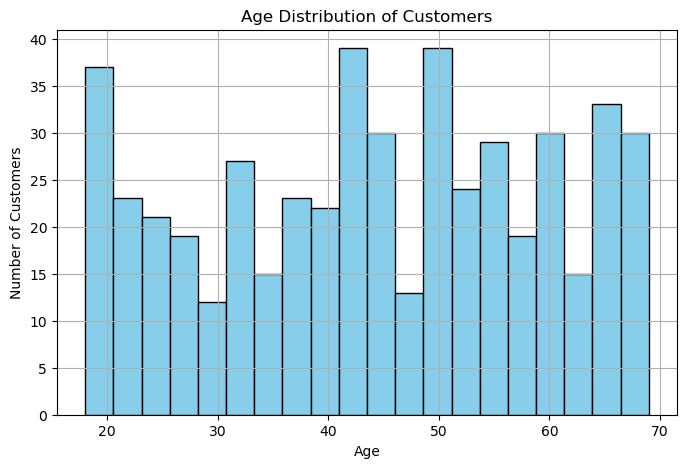

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

C:\Users\Reuel\AppData\Local\Temp\ipykernel_2232\1607824377.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=income_levels, patch_artist=True, boxprops=dict(facecolor='lightgreen'))


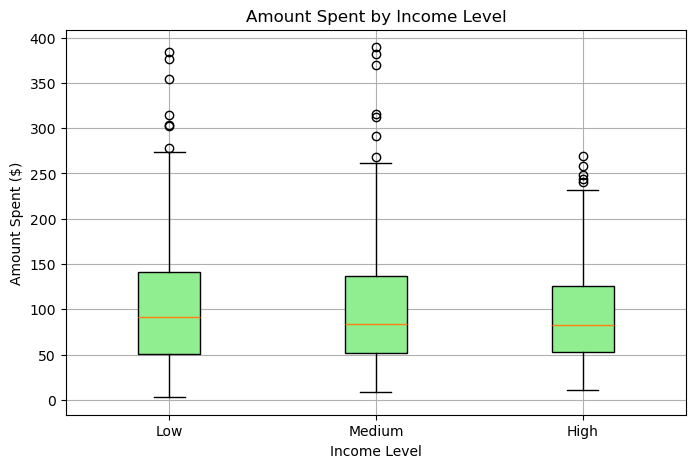

In [9]:
plt.figure(figsize=(8,5))
box_data = [df[df['Income']==level]['AmountSpent'] for level in income_levels]
plt.boxplot(box_data, labels=income_levels, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Amount Spent by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Amount Spent ($)')
plt.grid(True)
plt.show()

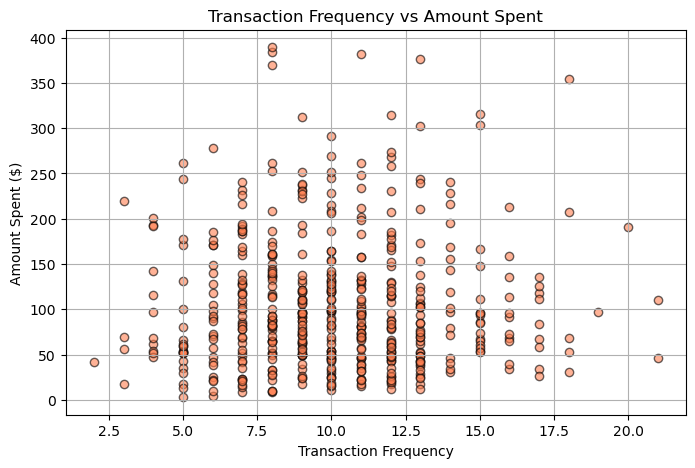

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(df['TransactionFreq'], df['AmountSpent'], alpha=0.6, c='coral', edgecolors='black')
plt.title('Transaction Frequency vs Amount Spent')
plt.xlabel('Transaction Frequency')
plt.ylabel('Amount Spent ($)')
plt.grid(True)
plt.show()

In [13]:
import pandas as pd
import numpy as np

# Load Excel file and sheets
file_path = "Customer_Churn_Data_Large.xlsx"
demographics = pd.read_excel(file_path, sheet_name='Customer_Demographics')
transactions = pd.read_excel(file_path, sheet_name='Transaction_History')

# --- Feature Engineering on Transactions (aggregate per customer) ---
# Total spent, number of transactions, average spend, number of product categories, recency
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
txn_agg = transactions.groupby('CustomerID').agg({
    'AmountSpent':['sum', 'mean', 'count'],
    'ProductCategory':'nunique',
    'TransactionDate':'max'
})
txn_agg.columns = ['TotalSpent', 'AvgSpent', 'TransactionCount', 'DistinctCategories', 'LastTransaction']

# Days since last transaction (assuming data upto 2022-12-31)
current_date = pd.to_datetime('2022-12-31')
txn_agg['RecencyDays'] = (current_date - txn_agg['LastTransaction']).dt.days

# Optional: define churn (e.g., Recency > X days = churn)
churn_threshold_days = 90
txn_agg['Churn'] = (txn_agg['RecencyDays'] > churn_threshold_days).astype(int)

# Merge features into demographic base
customer_df = demographics.merge(txn_agg.reset_index(), on='CustomerID', how='left')

# --- Data Preprocessing ---
# One-hot encode categorical variables
customer_df = pd.get_dummies(customer_df, columns=['Gender', 'MaritalStatus', 'IncomeLevel'], drop_first=True)
# Handle missing data if present (e.g., impute or drop)
customer_df = customer_df.dropna()

# Feature/Target split
X = customer_df.drop(['CustomerID', 'LastTransaction', 'Churn', 'RecencyDays'], axis=1)
y = customer_df['Churn']

# --- Train/Test Split ---
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    test_size=0.2, random_state=42)

# --- Random Forest Model and Hyperparameter Tuning ---
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

# --- Evaluation ---
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- Feature Importance ---
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feat_imp)

Precision: 0.56
Recall: 0.37
F1 Score: 0.44
ROC-AUC: 0.69
Confusion Matrix:
 [[123  17]
 [ 38  22]]
Feature Importances:
 TotalSpent               0.275312
AvgSpent                 0.198000
TransactionCount         0.152398
Age                      0.142460
DistinctCategories       0.096217
Gender_M                 0.026170
IncomeLevel_Low          0.024794
MaritalStatus_Widowed    0.023782
MaritalStatus_Married    0.021426
IncomeLevel_Medium       0.020882
MaritalStatus_Single     0.018558
dtype: float64
